### Chapter 4
# Training Models
Here, we will start by looking at the Linear Regression model. And discuss two very different ways to train it:
- Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set.
- Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method.

Next we will look at Polynomial Regression, a more complex model that can fit non‐linear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data.

Finally, we will look at two more models that are commonly used for classification tasks: Logistic Regression and Softmax Regression.

# Linear Regression
A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term.

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

This can be written much more concisely using a vectorized form.

$$\hat{y} = h_\theta (\mathbf{x}) = \theta^T . \mathbf{x}$$

To train a Linear Regression model, you need to find the value of θ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result. The MSE of a Linear Regression hypothesis $h_\theta$ on a training set **X** is calculated using equation:

$$MSE(\mathbf{X},h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T . \mathbf{x}^{(i)} - y^{(i)})^2$$

### The Normal Equation
To find the value of θ that minimizes the cost function, there is a *closed-form solution* (a mathematical equation that gives the result directly). This is called
the *Normal Equation*.

$$\hat\theta = (\mathbf{X}^T.\mathbf{X})^{-1}.\mathbf{X}^T.\mathbf{y}$$

Let’s generate some linear-looking data to test this equation on:

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

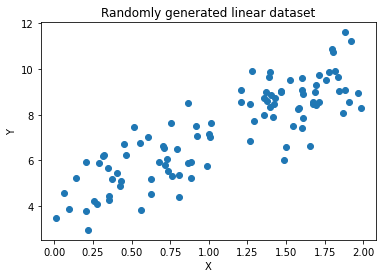

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Randomly generated linear dataset')
plt.show()

Now let’s compute $\hat\theta$ using the Normal Equation. We will use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [3]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is $y = 4 + 3x_0 + $ Gaussian noise. Let’s see what the equation found:

In [4]:
theta_best

array([[4.10824522],
       [2.91942177]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 3.887 and θ1 = 3.055. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now make predictions using $\hat\theta$ :

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.10824522],
       [9.94708876]])

Let’s plot this model’s predictions:

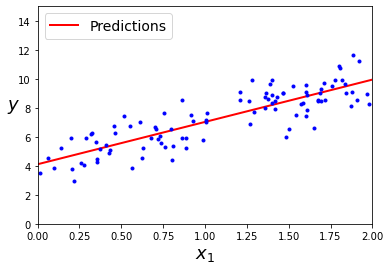

In [6]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

The equivalent code using Scikit-Learn looks like this:

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.10824522]), array([[2.91942177]]))

In [8]:
lin_reg.predict(X_new)

array([[4.10824522],
       [9.94708876]])

# Gradient Descent
Optimization algorithm: tweak parameters iteratively in order to minimize a cost function. It measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient.

The size of the steps, determined by the *learning rate* hyperparameter.

The MSE cost function for a Linear Regression model happens to be a convex function.

### Batch Gradient Descent
To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $θ_j$ (how much the cost function will change if you change $θ_j$): *partial derivative*.

Equation computes the partial derivative of the cost function with regards to parameter $θ_j$, noted $\frac{\partial}{\partial\theta_j}MSE(θ)$

$$\frac{\partial}{\partial\theta_j}MSE(θ) = \frac{2}{m}\sum\limits_{i=1}^m(\theta^T . \mathbf{x}^{(i)} - y^{(i)}){x_j}^{(i)}$$

The gradient vector, noted $∇_θ MSE(θ)$, contains all the partial derivatives of the cost function

$$∇_θ MSE(θ) = \frac{2}{m}\mathbf{X}^T.(\mathbf{X}.\theta - y)$$

This formula involves calculations over the full training set X.

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill: ($∇_θ MSE(θ) - θ$). Then multiply the gradient vector by learning rate $η$ to determine the size of the downhill step.

$$θ^{(next step)} = θ - η∇_θ MSE(θ)$$

Let’s look at a quick implementation of this algorithm:


In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[4.10824522],
       [2.91942177]])

In [11]:
X_new_b.dot(theta)

array([[4.10824522],
       [9.94708876]])

But what if you had used a different learning rate eta? Figure shows the first 10 steps of Gradient Descent using three different learning rates.

In [12]:
theta_path_bgd = []

In [13]:
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

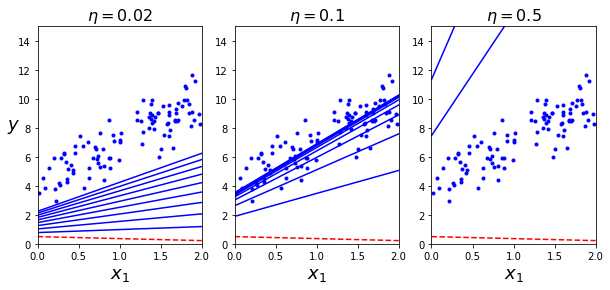

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

To find a good learning rate use grid search. And to set the number of iterations is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny.

### Stochastic Gradient Descent
The problem Batch Gradient Descent uses the whole training set to compute the gradients every step. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

The algorithm being described has a stochastic (random) nature, which makes it less regular than Batch Gradient Descent. As a result, the cost function will bounce up and down instead of gently decreasing until it reaches the minimum.

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

Since algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. This process is called *simulated annealing*. The function that determines the learning rate at each iteration is called the *learning schedule*.

This code implements Stochastic Gradient Descent using a simple learning schedule:

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

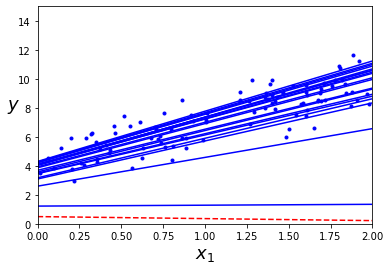

In [17]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)
                  
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()                

In [18]:
theta

array([[4.0741612 ],
       [2.99002501]])

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function. The following code runs 50 epochs, starting with a learning rate of 0.1 (eta0=0.1), using the default learning schedule, and it does not use any regularization (penalty=None; more details on this shortly):

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

Once again, you find a solution very close to the one returned by the Normal Equation:

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.11668925]), array([2.93851682]))

### Mini-batch Gradient Descent
It computes the gradients on small random sets of instances called *minibatches*.

The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches.

Figure shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[4.19092671],
       [3.05497317]])

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

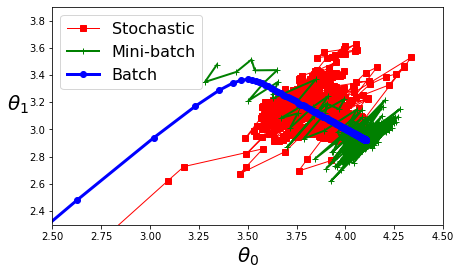

In [24]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Polynomial Regression
To use a linear model to fit nonlinear data by adding powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

let’s generate some nonlinear data, based on a simple *quadratic equation*:

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

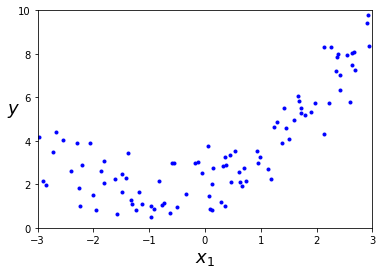

In [26]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

A straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square of each feature in the training set as new features.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [28]:
X_poly[0]

array([2.38942838, 5.709368  ])

X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data:

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

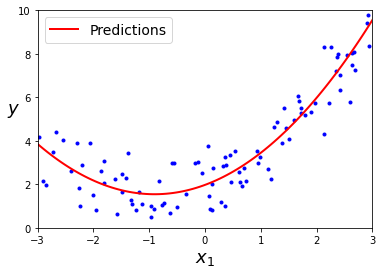

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

the model estimates $\hat y = 0.56 {x_1}^2 + 0.93x_1 + 1.78$ when in fact the original function was $y = 0.5x_1^2 + 1.0x_1 + 2.0$ + Gaussian noise.

### Learning Curve
If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. Let's look a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model.

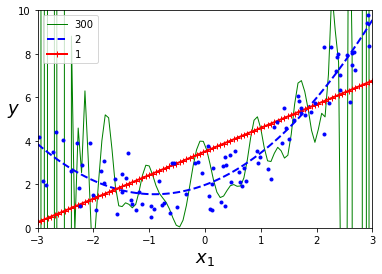

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

This high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model. It makes sense since the data was generated using a quadratic model.

To know your model is overfitting or underfitting the data  used cross-validation to get an estimate of a model’s generalization performance.

Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size.

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 

Let’s look at the learning curves of the plain Linear Regression model:

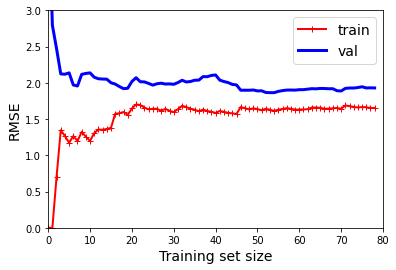

In [33]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()   

When the model is trained on just a few instances, it can fit the training data perfectly, but as more instances are added, the error on the training set goes up until it reaches a plateau. Similarly, the validation error is initially quite big when the model is trained on very few training instances, but as the model is shown more training examples, it learns and the validation error slowly goes down until it reaches a plateau.

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data:

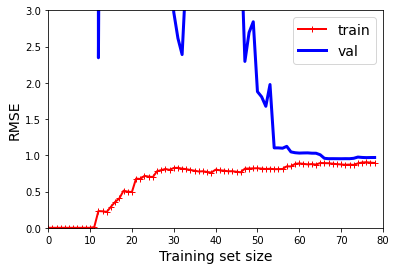

In [34]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
  ))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

There are two very important differences:
- The error on the training data is much lower than with the Linear Regression model.
- There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. Use a much larger training set, the two curves would continue to get closer.

# Regularized Linear Models
A simple way to regularize a polynomial model is to reduce the number of polynomial degrees. For a linear model, regularization is typically achieved by constraining the weights of the model.

### Ridge Regression (*Tikhonov* regularization)
Regularized version of Linear Regression: a regularization term equal to $α \sum\limits_{i=1}^n \theta_i^2$ is added to the cost function. This forces learning algorithm to fit the data and also keep the weights as small as possible. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

The hyperparameter α controls how much you want to regularize the model. If α = 0 then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

$$ J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum\limits_{i=1}^n\theta_i^2 $$

Figure shows several Ridge models trained on some linear data using different α value. On the left, plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using PolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finally the Ridge models are applied to the resulting features. Increasing α leads to flatter predictions; this reduces the model’s variance but increases its bias.

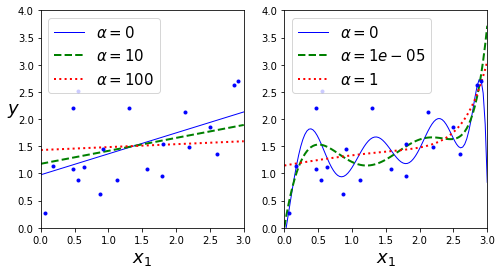

In [35]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

Ridge Regression closed-form solution
$$ \hat\theta = (\mathbf{X}^T.\mathbf{X} + α\mathbf{A})^{-1}.\mathbf{X}^T.\mathbf{y} $$

To perform Ridge Regression with Scikit-Learn using a closed-form solution:

In [36]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

And using Stochastic Gradient Descent:

In [37]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

The penalty hyperparameter sets the type of regularization term to use.

### Lasso Regression
*Least Absolute Shrinkage and Selection Operator Regression* is another regularized version of Linear Regression, it adds a regularization term to the cost function, but it uses the $ℓ_1$ norm of the weight vector instead of half the square of the $ℓ_2$ norm.

$$ J(\theta) = MSE(\theta) + \alpha\sum\limits_{i=1}^n|\theta_i| $$

Replace Ridge models with Lasso models and uses smaller α values.

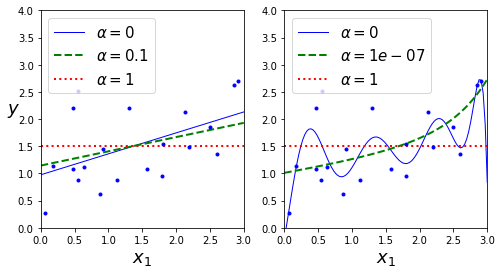

In [38]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

Lasso Regression tends to completely eliminate the weights of the least important features. For example, the dashed line in the right plot on looks quadratic, almost linear. It automatically performs feature selection and outputs a *sparse model*.

Here is a small Scikit-Learn example using the Lasso class:

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression which means simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

$$ J(\theta) = MSE(\theta) + r\alpha\sum\limits_{i=1}^n|\theta_i| + \frac{1-r}{2}\alpha\sum\limits_{i=1}^n\theta_i^2 $$

For bit of regularization, avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero. Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Scikit-Learn’s ElasticNet (l1_ratio corresponds to the mix ratio r):

In [40]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping
*Early Stopping*: A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. Figure shows a complex model being trained using Batch Gradient Descent. As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set. After a while the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data.

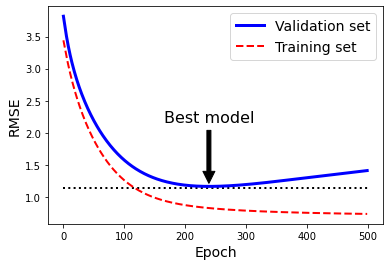

In [41]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

Here is a basic implementation of early stopping:

In [42]:
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, 
                       learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

c:\Users\Kushan\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\Users\Kushan\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\Users\Kushan\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\Users\Kushan\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached bef

# Logistic Regression
some regression algorithms can be used for classification. *Logistic Regression* (Logit Regression) is commonly used to estimate the probability (greater than 50%) that an instance belongs to a particular class.

### Estimating Probabilities
Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

*Logistic Regression model estimated probability (vectorized form)*:
$$ \hat p = h_\theta(\mathbf{x}) = \sigma(\theta^T.\mathbf{x}) $$

The logistic—also called the logit, noted σ(·)—is a sigmoid function that outputs a number between 0 and 1.

*Logistic function:*
$$ \sigma(t) = \frac{1}{1 + exp(-t)} $$


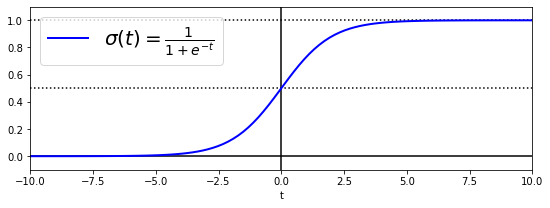

In [43]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Logistic Regression model has estimated the probability p = $ h_θ(\mathbf{x}) $  that an instance x belongs to the positive class, it can make its prediction ŷ easily.

$ \hat y $ =0 if $ \hat p $ < 0 . 5, 1 if $ \hat p $ ≥ 0 . 5

Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression model predicts 1 if $ θ^T · \mathbf{x} $ is positive, and 0 if it is negative.

### Training and Cost Function
The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances and low probabilities for negative instances.

*Cost function of a single training instance:*

c(θ) = − log ($\hat{p}$) if y = 1, − log (1 − $\hat{p}$) if y = 0 .

### Decision Boundaries
Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature. First let’s load the data:

In [44]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [45]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

Now let’s train a Logistic Regression model:

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm:

c:\Users\Kushan\Anaconda3\lib\site-packages\matplotlib\patches.py:1390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


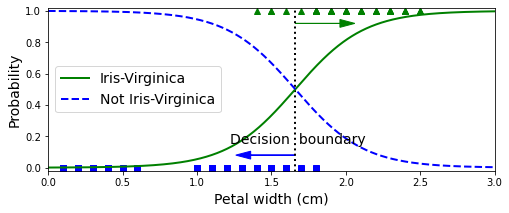

In [48]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

The petal width of Iris-Virginica flowers ranges from 1.4 cm to 2.5 cm, while the other iris flowers generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Above about 2 cm the classifier is highly confident that the flower is an IrisVirginica, while below 1 cm it is highly confident that it is not an Iris-Virginica. In between these extremes, the classifier is unsure, but if you ask it to predict the class it will return whichever class is the most likely. Therefore, there is a *decision boundary* at around 1.6 cm where both probabilities are equal to 50%

In [49]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Figure shows shows the same dataset with two features: petal width and length. Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features. The dashed line represents the points where the model estimates a 50% probability: model's decision boundary (linear boundary). Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.

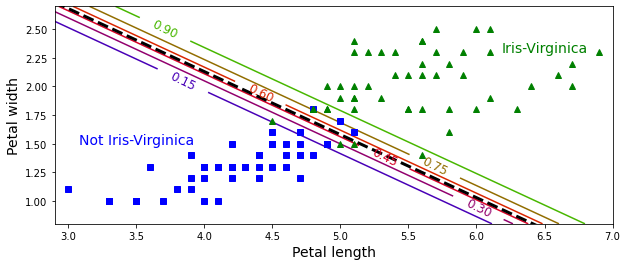

In [50]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Softmax Regression
The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called *Somax Regression*, or *Multinomial Logistic Regression*.

when given an instance **x**, the Softmax Regression model first computes a score $ s_k(\mathbf{x}) $ for each class k, then estimates the probability of each class by applying the *softmax function* (normalized exponential) to the scores.

*Softmax score for class k*
$$ s_k(\mathbf{x}) = \theta_k^T.\mathbf{x} $$

We would have a set of weights for each class, represented by the parameter vectors θk. These parameter vectors are typically stored in a parameter matrix Θ, where each row corresponds to the weights for a single class.

Once you have computed the score of every class for the instance x, you can estimate
the probability $ \hat p_k $ that the instance belongs to class k by running the scores through the softmax function:

$$ \hat p_k = σ(s(\mathbf{x}))_k $$

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability.

$$ \hat{p}_k = \sigma(\textbf{s}(\textbf{x}))_k = \frac{exp(s_k(\textbf{x}))}{\sum\limits_{j=1}^{\textbf{K}}exp(s_j(x))} $$

let’s take a look at training. The objective is to have a model that estimates a high probability for the target class. Minimizing the cost function shown in Equation, called the *cross entropy*, because it penalizes the model when it estimates a low probability for a target class.

$$ J(\Theta) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log(\hat{p}_k^{(i)}) $$

Let’s use Softmax Regression to classify the iris flowers into all three classes. ScikitLearn’s Logistic Regression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead. You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver. It also applies ℓ2 regularization by default, which you can control using the hyperparameter C.

In [51]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

To find an iris with 5 cm long and 2 cm wide petals, you can ask your model to tell you what type of iris it is, and it will answer Iris-Virginica (class 2) with 94.2% probability:

In [52]:
softmax_reg.predict([[5, 2]])

array([2])

In [53]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Figure shows the resulting decision boundaries, represented by the background colors. The figure also shows the probabilities for the Iris-Versicolor class, represented by the curved lines. Notice that the model can predict a class that has an estimated probability below 50%. at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.

In [54]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

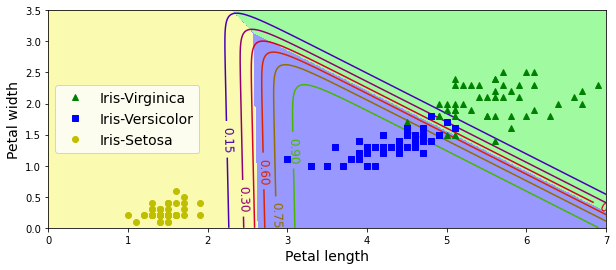

In [65]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [66]:
softmax_reg.predict([[5, 2]])

array([2])

In [67]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])